# Part A: Classification Problem

* **Name** Acharya Atul
* **Matriculation Number** U1923502C
* **Email** atul001@e.ntu.edu.sg

# Question 3

### Install latest version of tensroflow

In [1]:
!pip install --upgrade tensorflow

!pip install git+https://github.com/tensorflow/docs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator

### Neccessary Imports

* **pandas** - Data analysis and manipulation
* **matplotlib** - Plotting graphs and creating visuals
* **sklearn** - Basic data preprocessing, splitting dataset and cross validation
* **tensorflow** - Modeling neural networks and training them
* **tensorflow_docs** - Plot histories neatly

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold

import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

2022-10-08 14:22:13.698310: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-08 14:22:13.871147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-08 14:22:13.871181: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-08 14:22:13.909905: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to r

### Setting the seed for reproducability

>For this assignment we will be using 42 as the seed

In [3]:
SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

### Reading dataset

In [4]:
df = pd.read_csv('../input/assignment/full.csv') 
df.head()

,filename,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_var,chroma_cq_mean,chroma_cq_var,chroma_cens_mean,chroma_cens_var,...,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var
0,app_3001_4001_phnd_neg_0000.wav,184.570312,623,69.222222,0.515281,0.093347,0.443441,0.082742,0.249143,0.021261,...,-10.669799,63.340282,1.811605,58.117188,-3.286546,54.268448,-2.719069,59.548176,-4.559987,70.774803
1,app_3001_4001_phnd_neg_0001.wav,151.999081,521,74.428571,0.487201,0.094461,0.542182,0.073359,0.274423,0.008025,...,-5.666375,90.256195,1.573594,105.070496,-0.742024,82.417496,-1.961745,119.312355,1.513660,101.014572
2,app_3001_4001_phnd_neg_0002.wav,112.347147,1614,146.727273,0.444244,0.099268,0.442014,0.083224,0.264430,0.013410,...,-5.502390,73.079750,0.202623,72.040550,-4.021009,73.844353,-5.916223,103.834824,-2.939086,113.598824
3,app_3001_4001_phnd_neg_0003.wav,107.666016,2060,158.461538,0.454156,0.100834,0.424370,0.084435,0.257672,0.016938,...,-8.812989,93.791893,-0.429413,60.002579,-4.013513,82.544540,-5.858006,84.402092,0.686969,90.126389
4,app_3001_4001_phnd_neg_0004.wav,75.999540,66,33.000000,0.478780,0.100000,0.414859,0.089313,0.252143,0.019757,...,-6.584204,64.973305,0.744403,68.908516,-6.354805,66.414391,-6.555534,47.852840,-4.809713,73.033966


In [5]:
df['label'] = df['filename'].str.split('_').str[-2]

In [6]:
df['label'].value_counts()

pos    92826
neg    89428
Name: label, dtype: int64

### Function to preprocess the dataset and split it into train and test

In [7]:
def split_dataset(df, columns_to_drop, test_size, random_state):
    label_encoder = preprocessing.LabelEncoder()

    df['label'] = label_encoder.fit_transform(df['label'])

    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)

    df_train2 = df_train.drop(columns_to_drop,axis=1)
    y_train2 = df_train['label'].to_numpy()

    df_test2 = df_test.drop(columns_to_drop,axis=1)
    y_test2 = df_test['label'].to_numpy() 

    return df_train2, y_train2, df_test2, y_test2

### Function to appropriately scale the dataset

In [8]:
def preprocess_dataset(df_train, df_test):

    standard_scaler = preprocessing.StandardScaler()
    df_train_scaled = standard_scaler.fit_transform(df_train)

    df_test_scaled = standard_scaler.transform(df_test)

    return df_train_scaled, df_test_scaled

### Preprocess and scale the dataset

In [9]:
columns_to_drop = ['label','filename']

X_train, y_train, X_test, y_test = split_dataset(df, columns_to_drop, test_size=0.3, random_state=0) # positive labels being encoded as 1

### Set variables for training
* **Number of epochs**: 50
* **Number of folds**: 5
* **Optimal Batch Size**: 512
* **Search space of batch size**: [ 64, 128, 256 ]
> Note: The optimal batch size was determined in Part-A, Question 2

In [10]:
num_epochs = 100

num_folds = 5

hidden_layers = [64, 128, 256]

optimal_batch_size = 512

### Create model architecture based on specifications
>The function takes an additional argument - **hidden_layer_size** which is the size of the first hidden layer. The remaining hidden layers have a size of 128 neurons

In [11]:
def create_model(input_shape, hidden_layer_size):
    
    num_neurons = 128
    
    model = Sequential([
        InputLayer(input_shape=(input_shape,)),
        Dense(hidden_layer_size, activation='relu'),
        Dropout(0.2),
        Dense(num_neurons, activation='relu'),
        Dropout(0.2),
        Dense(num_neurons, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.001)

    model.compile(
            optimizer=optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
    
    return model

## Part A
>Plot the mean cross-validation accuracies on the final epoch for different
numbers of hidden-layer neurons using a scatter plot. Limit the search space of the
number of neurons to {64, 128, 256}. 

### Hyperparamter tuning with 5-Fold Cross Validation
> For each batch size we perform a 5-Fold cross validation and report the mean validation accuracy. In my experiment, I have chosen the outer loop to iterate through the hidden layer size space and the inner loop performs the 5-Fold Cross Validation. I wanted each hidden layer size to be its own experiment. Note that you can reverse the loop order and train for each hidden layer size on the same fold. Since I am using a seed, the cross validation split should be the same and both methods must give the same answer.

> **Scaling** <br>
The scaling is performed in the Cross Validation loop and the scalar is fit only on the training fold and not the validation fold. This is done to prevent data leakage and it does not include the validation set when calculating the statistics for the training set.

In [12]:
input_shape = X_train.shape[1]

hidden_layers_acc = {}

for hidden_layer_neurons in hidden_layers:
    print(f'Hidden Layer Size {hidden_layer_neurons}')
    fold = 0
    acc = []
    cv = KFold(n_splits=num_folds, shuffle=True, random_state=SEED)

    for i, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
        
        X_train_copy, y_train_copy  = X_train.iloc[train_idx], y_train[train_idx]
        X_val, y_val = X_train.iloc[val_idx], y_train[val_idx]

        X_train_copy_scaled, X_val_scaled = preprocess_dataset(X_train_copy, X_val)
        
        model = create_model(input_shape, hidden_layer_neurons)

        optimizer = Adam(learning_rate=0.001)

        model.compile(optimizer=optimizer,
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

        early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
            
        history = model.fit(X_train_copy_scaled, y_train_copy,
                            epochs=num_epochs,
                            verbose=0,
                            batch_size=optimal_batch_size,
                            use_multiprocessing=False,
                            validation_data=(X_val_scaled, y_val),
                            callbacks=[early_stopping_callback] 
                        )
        
        acc.append(history.history['val_accuracy'][-1])
        
        print(f'Hidden Layer Size {hidden_layer_neurons} | fold {fold} | validation accuracy {acc[fold]}')
        fold += 1
        
    print('* mean accuracy = %g *'% np.mean(acc))
    hidden_layers_acc[hidden_layer_neurons] = np.mean(acc)

Hidden Layer Size 64


2022-10-08 14:22:26.309281: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-10-08 14:22:26.309324: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-08 14:22:26.309353: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (699353cd4744): /proc/driver/nvidia/version does not exist
2022-10-08 14:22:26.309675: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

Hidden Layer Size 64 | fold 0 | validation accuracy 0.6285467743873596
Hidden Layer Size 64 | fold 1 | validation accuracy 0.6148298978805542
Hidden Layer Size 64 | fold 2 | validation accuracy 0.6285322308540344
Hidden Layer Size 64 | fold 3 | validation accuracy 0.6284146308898926
Hidden Layer Size 64 | fold 4 | validation accuracy 0.614814817905426
* mean accuracy = 0.623028 *
Hidden Layer Size 128
Hidden Layer Size 128 | fold 0 | validation accuracy 0.6425380110740662
Hidden Layer Size 128 | fold 1 | validation accuracy 0.6485734581947327
Hidden Layer Size 128 | fold 2 | validation accuracy 0.6571820378303528
Hidden Layer Size 128 | fold 3 | validation accuracy 0.6525965332984924
Hidden Layer Size 128 | fold 4 | validation accuracy 0.6601998805999756
* mean accuracy = 0.652218 *
Hidden Layer Size 256
Hidden Layer Size 256 | fold 0 | validation accuracy 0.674439549446106
Hidden Layer Size 256 | fold 1 | validation accuracy 0.6795735955238342
Hidden Layer Size 256 | fold 2 | validati

### Scatter plot of mean cross-validation accuracies on the final epoch for different batch sizes 

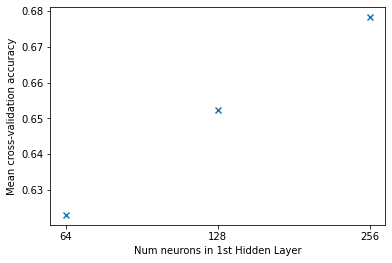

In [13]:
fig, ax = plt.subplots()
ax.scatter([str(hidden_layers) for hidden_layers in hidden_layers_acc.keys()], hidden_layers_acc.values(),  marker = 'x')
plt.xlabel('Num neurons in 1st Hidden Layer')
plt.ylabel('Mean cross-validation accuracy')
plt.show()

### Observations
>The cross validation accuracy inceases as the number of neurons in the first hidden layer increases. This is because each neuron tries to learn a relationship between the features and learns more features. The approximation of the function improves leading to better results.

## Part B
>Select the optimal number of neurons for the hidden layer. State the rationale
for your selection.

### Selection of optimal number of neurons
> To select the optimal number of neurons we need to analyze the tradeoff between accuracy and the computation cost. As the number of neurons increases, the accuracy improves, but this results in more computations. Since the assignment is fairly small and increasing number of neurons doesnt drastically affect training time, the optimal number of neurons was selected solely based on cross validation accuracy
<br>
**Optimal Number of Neurons in first hidden layer = 256**

In [14]:
optimal_hidden_layer_size = max(hidden_layers_acc, key=hidden_layers_acc.get)
print(f'Optimal Hidden Layer Size of 1st layer: {optimal_hidden_layer_size}')

Optimal Hidden Layer Size of 1st layer: 256


In [15]:
# Dictionary to save histories of different models
histories = {}

## Part C
>Plot the train and test accuracies against training epochs with the optimal
number of neurons using a line plot

### Training model on entire training set with optimal hidden layer size

In [16]:
X_train_scaled, X_test_scaled = preprocess_dataset(X_train, X_test)

model = create_model(input_shape, optimal_hidden_layer_size)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
    
history = model.fit(X_train_scaled, y_train,
                    epochs=num_epochs,
                    verbose=1,
                    batch_size=optimal_batch_size,
                    use_multiprocessing=False,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping_callback] 
                )

histories['non_regularized'] = history

Epoch 1/100
250/250 [==============================] - 3s 10ms/step - loss: 0.6898 - accuracy: 0.5368 - val_loss: 0.6849 - val_accuracy: 0.5495
Epoch 2/100
250/250 [==============================] - 3s 10ms/step - loss: 0.6831 - accuracy: 0.5537 - val_loss: 0.6807 - val_accuracy: 0.5580
Epoch 3/100
250/250 [==============================] - 2s 9ms/step - loss: 0.6793 - accuracy: 0.5616 - val_loss: 0.6803 - val_accuracy: 0.5588
Epoch 4/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6763 - accuracy: 0.5685 - val_loss: 0.6743 - val_accuracy: 0.5712
Epoch 5/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6717 - accuracy: 0.5770 - val_loss: 0.6713 - val_accuracy: 0.5784
Epoch 6/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6672 - accuracy: 0.5854 - val_loss: 0.6684 - val_accuracy: 0.5839
Epoch 7/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6624 - accuracy: 0.5926 - val_loss: 0.6623 - val_accuracy: 

## Plot of train and test accuracies

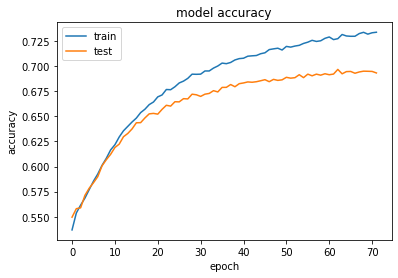

In [17]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Plot of train and test losses

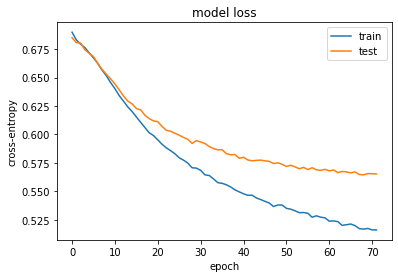

In [18]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('cross-entropy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

## Part D
>How does dropouts work, and what is the purpose of dropouts?

### Dropouts
>Dropouts randomly drop neurons (along with their
connections) from the networks during training. This prevents neurons
from co-adapting and thereby reduces overfitting <br><br>
**Training Time** - The units (neurons) are presented with a probability p and presented to the next layer with weight W to the next layer at the training time<br><br>
**Test Time** - At test time, the weights are always present and presented to the network with weights multiplied by probability p (dropout rate)<br><br>
Applying dropouts result in a ‘thinned network’ that consists of only
neurons that survived. This minimizes the redundancy in the network <br><br>
**Purpose** - Dropouts helps prevent overfitting. Dropout prevents overfitting due to a layer's over-reliance on a few of its inputs. Because these inputs aren't always present during training (i.e. they are dropped at random), the layer learns to use all of its inputs, improving generalization.

## Part E
>Besides early stopping and dropout, what is another approach that you could
take to address overfitting in the model, and how does it work? Implement the
approach

### L2 Regularization
>During overfitting, some weights attain large values to reduce training error,
jeopardizing its ability to generalizing. In order to avoid this, a penalty term
***(regularization term)*** is added to the cost function. <br>

>Let $J$ be the standard cost function. Then the cost function after applyting regularization is given by: <br> $J_1 = J + \beta_2*\Sigma(w_{ij})$ <br>
$\beta_2$ is known as the weight decay parameter

### Optimal Model Architecture with L2 Regularization

In [19]:
def create_regularized_model(input_shape, hidden_size):
    model = Sequential([
        InputLayer(input_shape=(input_shape,)),
        Dense(hidden_size, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
        Dropout(0.2),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
        Dropout(0.2),
        Dense(1, activation='sigmoid', kernel_regularizer=l2(0.0001))
    ])

    optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=optimizer,
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    return model


### Training Regularized Model

In [20]:
X_train_scaled, X_test_scaled = preprocess_dataset(X_train, X_test)

model = create_regularized_model(input_shape, optimal_hidden_layer_size)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
    
history = model.fit(X_train_scaled, y_train,
                    epochs=num_epochs,
                    verbose=1,
                    batch_size=optimal_batch_size,
                    use_multiprocessing=False,
                    validation_data=(X_test_scaled, y_test),
                    callbacks=[early_stopping_callback] 
                )

histories['regularized'] = history

Epoch 1/100
250/250 [==============================] - 3s 11ms/step - loss: 0.7154 - accuracy: 0.5389 - val_loss: 0.7060 - val_accuracy: 0.5520
Epoch 2/100
250/250 [==============================] - 2s 10ms/step - loss: 0.7019 - accuracy: 0.5520 - val_loss: 0.6967 - val_accuracy: 0.5583
Epoch 3/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6933 - accuracy: 0.5611 - val_loss: 0.6925 - val_accuracy: 0.5609
Epoch 4/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6874 - accuracy: 0.5697 - val_loss: 0.6852 - val_accuracy: 0.5738
Epoch 5/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6820 - accuracy: 0.5763 - val_loss: 0.6820 - val_accuracy: 0.5791
Epoch 6/100
250/250 [==============================] - 3s 12ms/step - loss: 0.6768 - accuracy: 0.5847 - val_loss: 0.6779 - val_accuracy: 0.5834
Epoch 7/100
250/250 [==============================] - 2s 10ms/step - loss: 0.6721 - accuracy: 0.5922 - val_loss: 0.6742 - val_accuracy:

### Plot of Regularized model accuracy

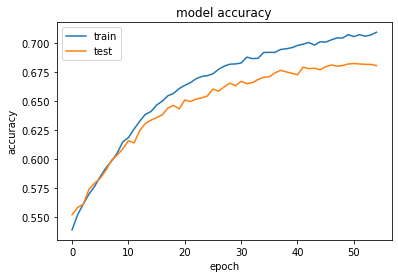

In [21]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Plot of Regularized model loss

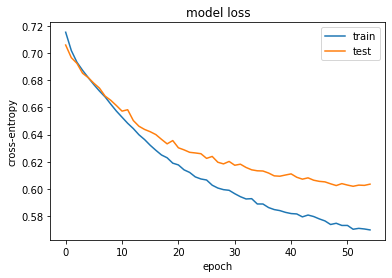

In [22]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('cross-entropy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

### Comparison of Optimal Model with the Regularized Model

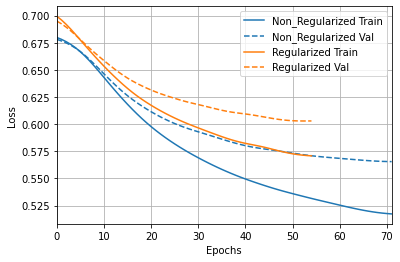

In [23]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'loss', smoothing_std=10)
plotter.plot(histories)

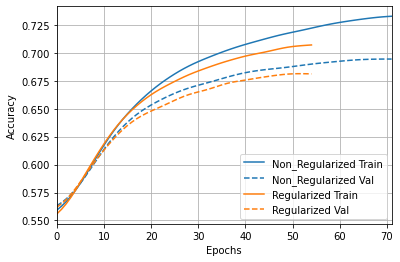

In [24]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)